In [1]:
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

In [2]:
def draw_card_visual(ax, x, y, card_name, hidden=False):
    if hidden:
        rect = FancyBboxPatch((x, y), 0.5, 0.7, 
                             boxstyle="round,pad=0.02",
                             linewidth=2, 
                             edgecolor='black', 
                             facecolor='#1a1a4d')
        ax.add_patch(rect)
        ax.text(x + 0.25, y + 0.35, '?', 
               fontsize=40, ha='center', va='center', 
               color='white', weight='bold')
    else:
        if '♥' in card_name or '♦' in card_name:
            color = 'red'
        else:
            color = 'black'
        
        rect = FancyBboxPatch((x, y), 0.5, 0.7, 
                             boxstyle="round,pad=0.02",
                             linewidth=2, 
                             edgecolor='black', 
                             facecolor='white')
        ax.add_patch(rect)
        
        ax.text(x + 0.25, y + 0.35, card_name, 
               fontsize=24, ha='center', va='center', 
               color=color, weight='bold')

def display_hands(dealer_cards, player_cards, dealer_hidden=True, split_hands=None):
    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    ax = plt.gca()
    
    ax.text(0.5, 6.5, "DEALER'S HAND", fontsize=16, weight='bold', ha='center')
    for i, card in enumerate(dealer_cards):
        hidden = dealer_hidden and i == 1
        draw_card_visual(ax, i * 0.6, 5.5, format_card(card), hidden)
    
    if split_hands:
        for hand_idx, hand in enumerate(split_hands):
            y_pos = 3.5 - (hand_idx * 2)
            ax.text(0.5, y_pos + 1, f"HAND {hand_idx + 1}", fontsize=16, weight='bold', ha='center')
            for i, card in enumerate(hand):
                draw_card_visual(ax, i * 0.6, y_pos, format_card(card))
    else:
        ax.text(0.5, 4, "YOUR HAND", fontsize=16, weight='bold', ha='center')
        for i, card in enumerate(player_cards):
            draw_card_visual(ax, i * 0.6, 3, format_card(card))
    
    ax.set_xlim(-0.5, 6)
    ax.set_ylim(0, 7)
    ax.axis('off')
    plt.tight_layout()
    plt.pause(0.1)

def format_card(card):
    suits = ['♠', '♥', '♦', '♣']
    suit = random.choice(suits)
    return f"{card}{suit}"

Let's Play Blackjack!
Dealer's Cards: 4, ???
Dealer showing: 4
Player's Cards: ['2', 'A']
Player Total: 13


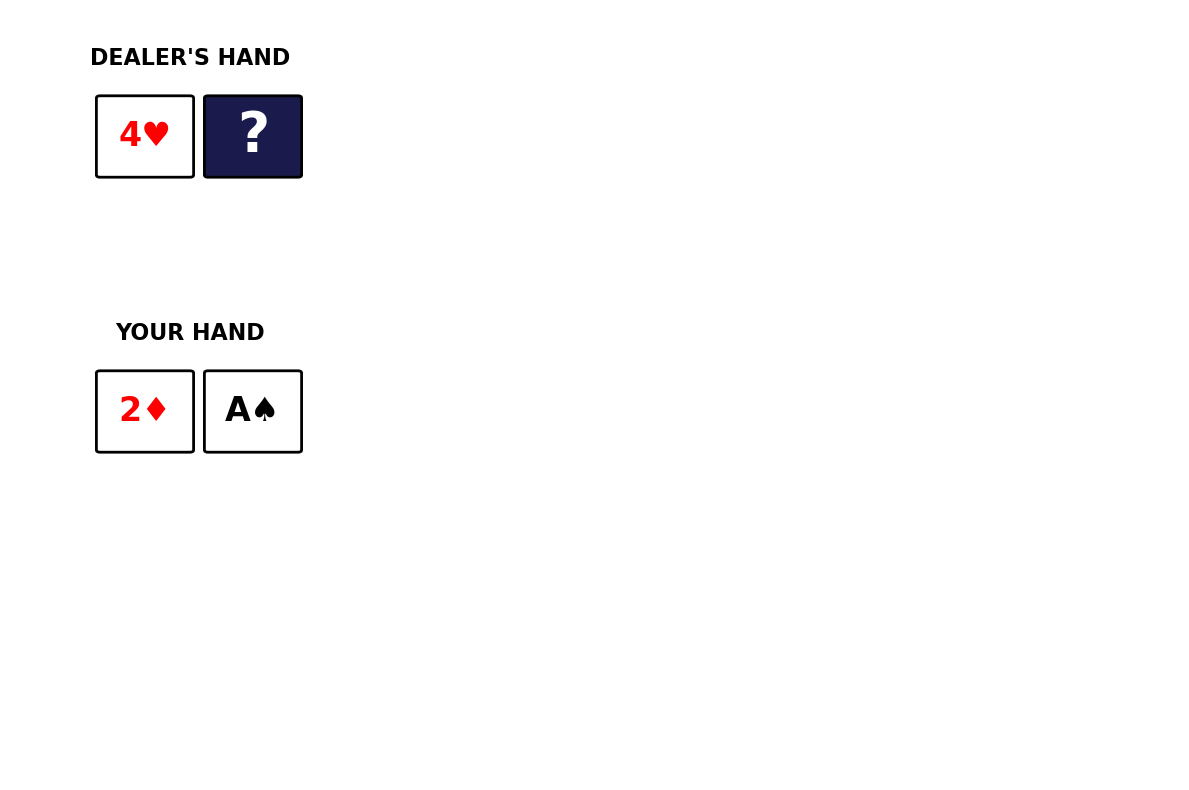

Do you want to hit or stand?  stand



--- Dealer's Turn ---
Dealer reveals: A
Dealer's Cards: ['4', 'A']
Dealer Total: 15


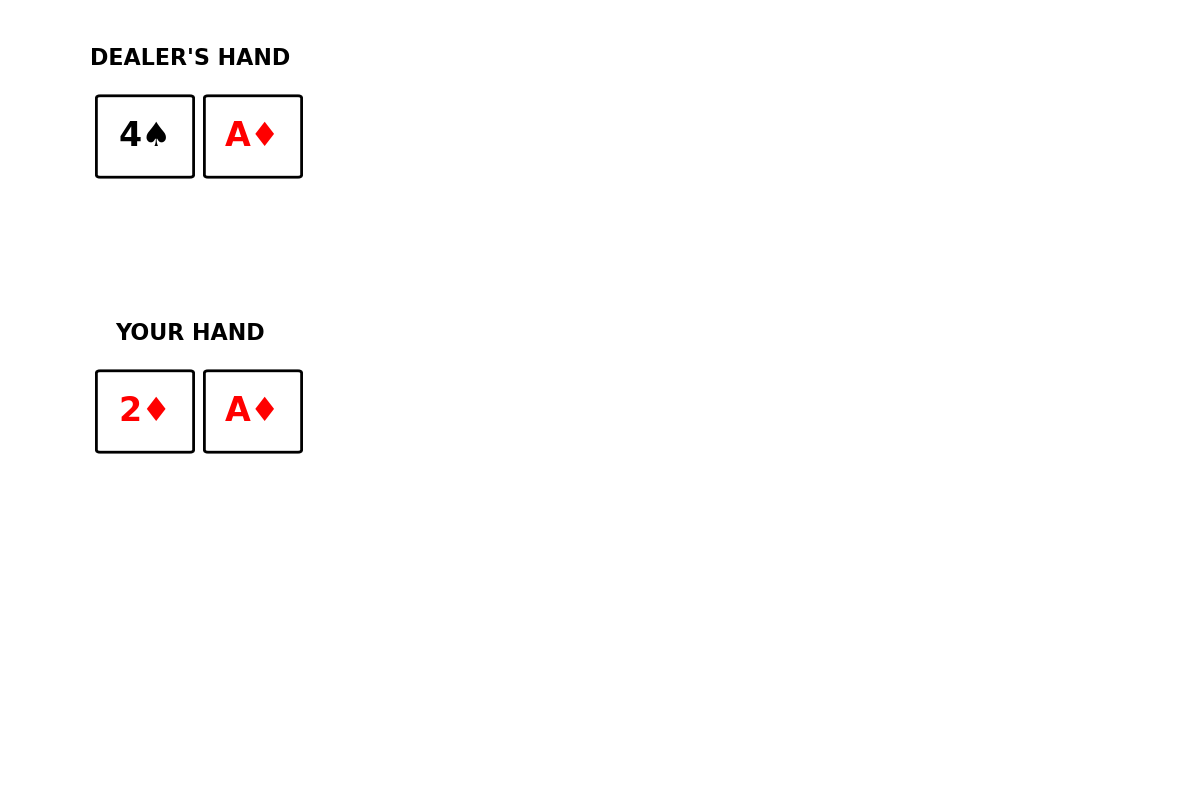


Dealer hits: 9
Dealer's Cards: ['4', 'A', '9']
Dealer Total: 14


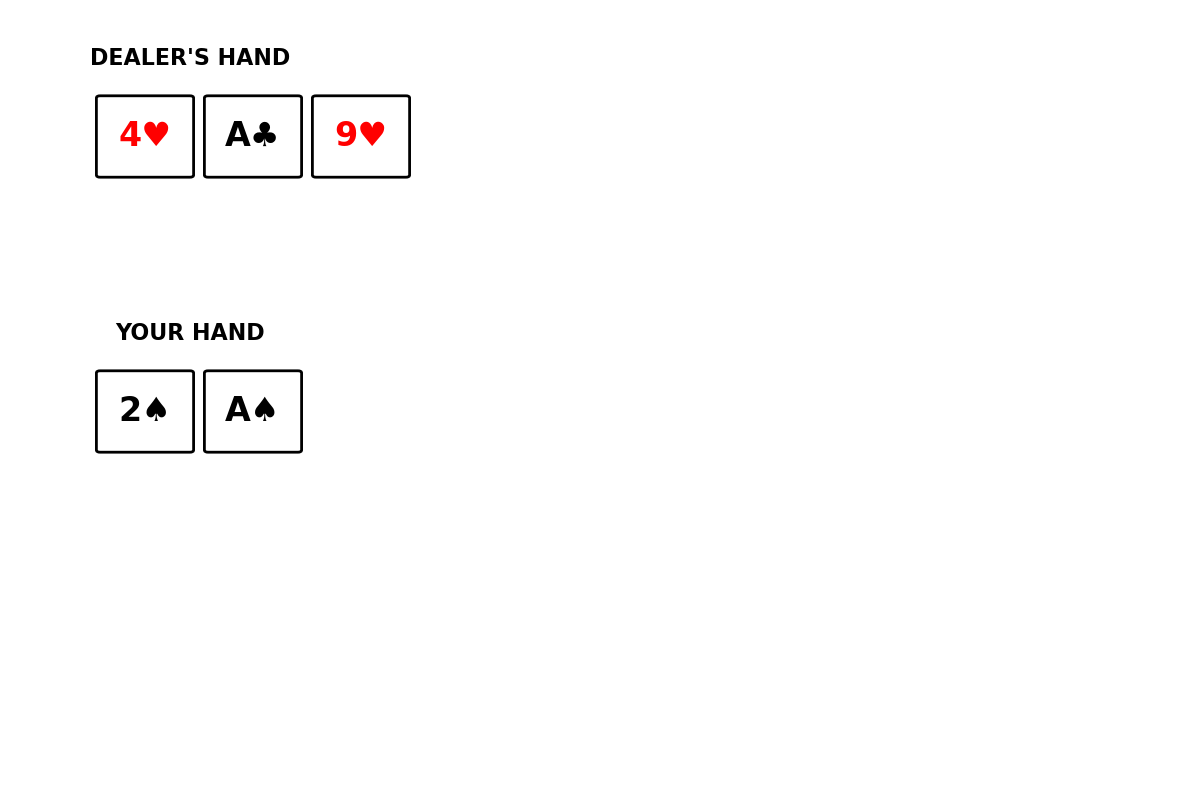


Dealer hits: J
Dealer's Cards: ['4', 'A', '9', 'J']
Dealer Total: 24


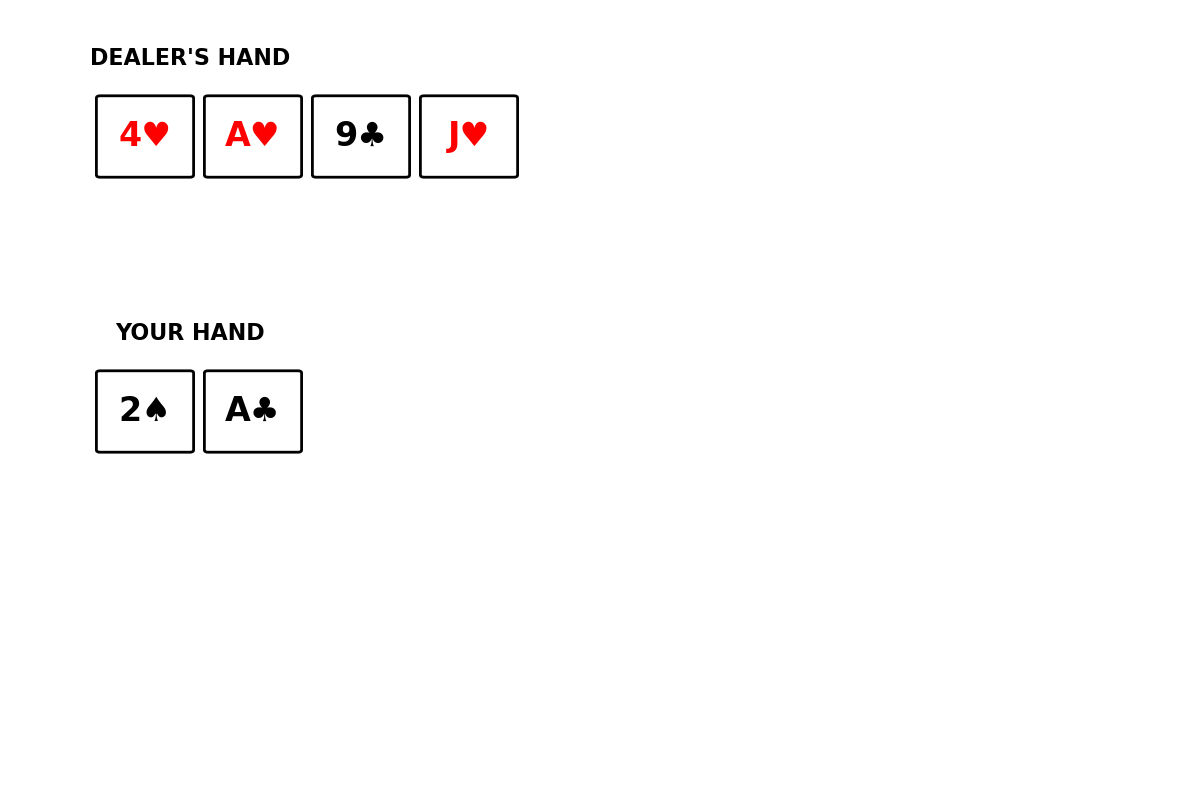


Dealer busts!

--- Final Results ---
Dealer Total: 24
Player Total: 13
Dealer busted. Player wins!


In [3]:
cards = {
    'A':11,
    '2':2,
    '3':3,
    '4':4,
    '5':5, 
    '6':6, 
    '7':7, 
    '8':8, 
    '9':9, 
    '10':10, 
    'J':10, 
    'Q':10, 
    'K':10
}

def eleven_or_ace(hand_list):
    total = 0
    aces = 0
    
    for card in hand_list:
        if card == 'A':
            aces += 1
            total += 11
        else:
            total += cards[card]
    
    while total > 21 and aces > 0:
        total -= 10
        aces -= 1
    
    return total

def play_hand(hand_list, hand_name="Hand", dealer_cards=[], all_hands=None):
    hand_value = eleven_or_ace(hand_list)
    print(f"\n{hand_name}: {hand_list}")
    print(f"{hand_name} Total: {hand_value}")
    
    display_hands(dealer_cards, hand_list, dealer_hidden=True, split_hands=all_hands)
    
    while True:
        choice = input(f"{hand_name} - Do you want to hit or stand? ").lower()
        
        if choice == 'hit':
            new_card = random.choice(list(cards.keys()))
            hand_list.append(new_card)
            hand_value = eleven_or_ace(hand_list)
            
            print(f"You drew: {new_card}")
            print(f"{hand_name}: {hand_list}")
            print(f"{hand_name} Total: {hand_value}")
            
            display_hands(dealer_cards, hand_list, dealer_hidden=True, split_hands=all_hands)
            
            if hand_value > 21:
                print(f"{hand_name} busts! You lost!")
                return hand_value
                    
        elif choice == 'stand':
            return hand_value
        else:
            print("Invalid choice. Please enter 'hit' or 'stand'.")

def determine_winner(player_total, dealer_total, hand_name=""):
    prefix = f"{hand_name}: " if hand_name else ""
    
    if player_total > 21:
        print(f"{prefix}Player busted. Dealer wins!")
    elif dealer_total > 21:
        print(f"{prefix}Dealer busted. Player wins!")
    elif dealer_total > player_total:
        print(f"{prefix}Dealer wins! You Lose! ({dealer_total} vs {player_total})")
    elif player_total > dealer_total:
        print(f"{prefix}Player wins! ({player_total} vs {dealer_total})")
    else:
        print(f"{prefix}It's a tie! ({player_total} vs {dealer_total})")

plt.ion()
fig, ax = plt.subplots(figsize=(12, 8))

limit = 21

dealercard1 = random.choice(list(cards.keys()))
dealercard2 = random.choice(list(cards.keys()))

playercard1 = random.choice(list(cards.keys()))
playercard2 = random.choice(list(cards.keys()))

print("Let's Play Blackjack!")
print(f"Dealer's Cards: {dealercard1}, ???")
dealerlist = [dealercard1, dealercard2]
dealerhand = eleven_or_ace([dealercard1])
print(f"Dealer showing: {dealerhand}")

playerlist = [playercard1, playercard2]
playerhand = eleven_or_ace(playerlist)
print(f"Player's Cards: {playerlist}")
print(f"Player Total: {playerhand}")

display_hands(dealerlist, playerlist, dealer_hidden=True)

can_split = cards[playercard1] == cards[playercard2]
split_hands = []

if can_split:
    while True:
        split_choice = input("You have a pair! Do you want to split? (yes/no) ").lower()
        if split_choice == 'yes':
            hand1 = [playercard1, random.choice(list(cards.keys()))]
            hand2 = [playercard2, random.choice(list(cards.keys()))]
            split_hands = [hand1, hand2]
            
            print("\n--- You've split your hand! ---")
            print(f"Hand 1: {hand1}")
            print(f"Hand 2: {hand2}")
            display_hands(dealerlist, [], dealer_hidden=True, split_hands=split_hands)
            break
        elif split_choice == 'no':
            break
        else:
            print("Invalid input! Please enter 'yes' or 'no'.")

if split_hands:
    player_totals = []
    for i, hand in enumerate(split_hands, 1):
        final_value = play_hand(hand, f"Hand {i}", dealerlist, split_hands)
        player_totals.append(final_value)
else:
    while True:
        choice = input("Do you want to hit or stand? ").lower()
        
        if choice == 'hit':
            new_card = random.choice(list(cards.keys()))
            playerlist.append(new_card)
            playerhand = eleven_or_ace(playerlist)
            
            print(f"You drew: {new_card}")
            print(f"Player's Cards: {playerlist}")
            print(f"Player Total: {playerhand}")
            
            display_hands(dealerlist, playerlist, dealer_hidden=True)
            
            if playerhand > 21:
                print("Bust! You lose!")
                break
                    
        elif choice == 'stand':
            break
        else:
            print("Invalid choice. Please enter 'hit' or 'stand'.")
    
    player_totals = [playerhand]

if any(total <= 21 for total in player_totals):
    dealerhand = eleven_or_ace(dealerlist)
    print(f"\n--- Dealer's Turn ---")
    print(f"Dealer reveals: {dealercard2}")
    print(f"Dealer's Cards: {dealerlist}")
    print(f"Dealer Total: {dealerhand}")

    if split_hands:
        display_hands(dealerlist, [], dealer_hidden=False, split_hands=split_hands)
    else:
        display_hands(dealerlist, playerlist, dealer_hidden=False)
    time.sleep(1)
    
    while dealerhand < 17:
        new_dealer_card = random.choice(list(cards.keys()))
        dealerlist.append(new_dealer_card)
        dealerhand = eleven_or_ace(dealerlist)
        
        print(f"\nDealer hits: {new_dealer_card}")
        print(f"Dealer's Cards: {dealerlist}")
        print(f"Dealer Total: {dealerhand}")
        
        if split_hands:
            display_hands(dealerlist, [], dealer_hidden=False, split_hands=split_hands)
        else:
            display_hands(dealerlist, playerlist, dealer_hidden=False)
        time.sleep(1)
        
        if dealerhand > 21:
            print("\nDealer busts!")
            break

    print("\n--- Final Results ---")
    print(f"Dealer Total: {dealerhand}")
    
    if split_hands:
        for i, total in enumerate(player_totals, 1):
            print(f"Hand {i} Total: {total}")
            determine_winner(total, dealerhand, f"Hand {i}")
    else:
        print(f"Player Total: {player_totals[0]}")
        determine_winner(player_totals[0], dealerhand)

plt.ioff()
plt.show()